In [1]:
import iapws
from iapws import IAPWS97 as gas
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
un = 1 / kPa
to_kelvin = lambda x: x + 273.15 if x else None
P_0= [5, 10, 15, 20]
t_0=[300, 350, 400, 450, 500]
t_0 = map(to_kelvin,t_0)
t_0 = list(t_0)
P_k = 5
def efficiency (P_0:float, t_0:float, P_k:float) -> float:
    P_0 =P_0 * MPa
    P_k= P_k * kPa
    point_0 = gas(P=P_0 * unit, T=t_0)
    point_condenser_inlet = gas(P=P_k * unit, s=point_0.s)
    point_pump_outlet = gas(P=P_k * unit, x=0)
    useful_energy = point_0.h - point_condenser_inlet.h
    full_energy = point_0.h - point_pump_outlet.h
    efficiency = round(useful_energy / full_energy * 100,3)
    return efficiency
 
for P_0value in P_0:
    for t_0value in t_0:
     print(efficiency(P_0value,t_0value,P_k))
efficienc = dict()
for P_0value in P_0:
    efficienc[P_0value] = []
    for t_0value in t_0:
        efficienc[P_0value].append(efficiency(P_0value,t_0value,P_k))
print (efficienc[5])
print (efficienc[10])
print (efficienc[15])
print (efficienc[20])

37.05
37.624
38.253
38.93
39.648
29.618
39.925
40.672
41.393
42.118
29.856
40.51
41.708
42.576
43.37
30.106
34.002
42.015
43.188
44.106
[37.05, 37.624, 38.253, 38.93, 39.648]
[29.618, 39.925, 40.672, 41.393, 42.118]
[29.856, 40.51, 41.708, 42.576, 43.37]
[30.106, 34.002, 42.015, 43.188, 44.106]


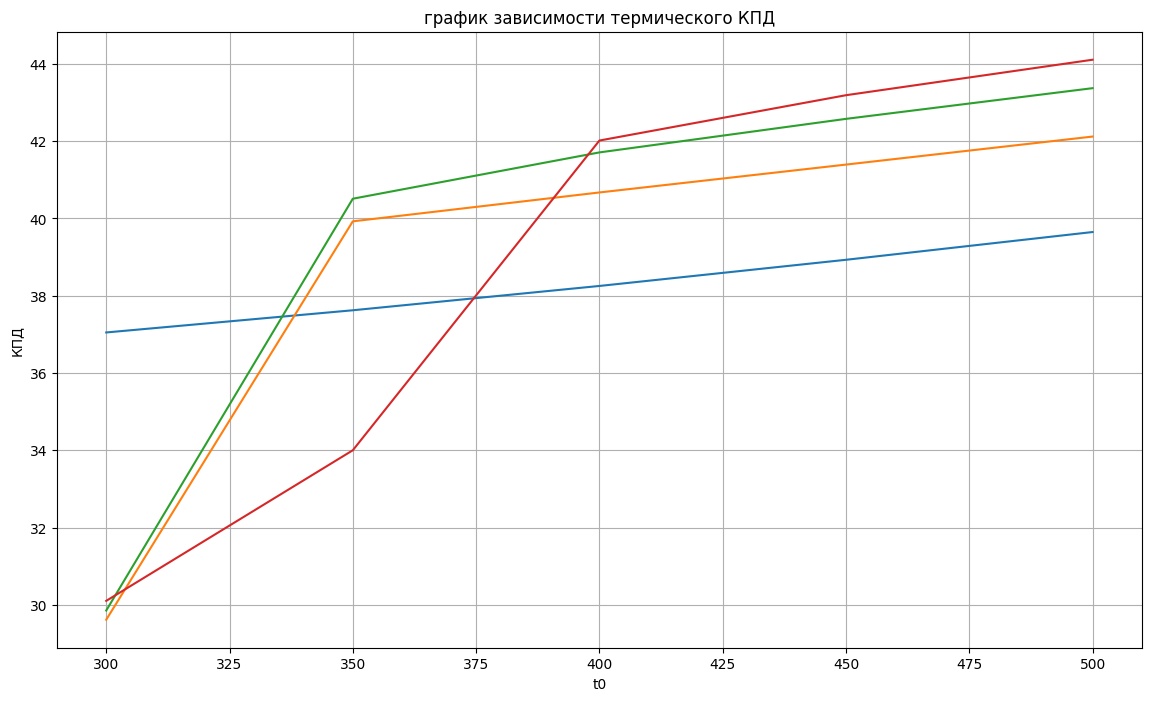

In [2]:
from matplotlib import pyplot as plt 
x = [300, 350, 400, 450, 500] 
y1 = [37.05, 37.624, 38.253, 38.93, 39.648]
y2 = [29.618, 39.925, 40.672, 41.393, 42.118]
y3 = [29.856, 40.51, 41.708, 42.576, 43.37]
y4 = [30.106, 34.002, 42.015, 43.188, 44.106]
fig, ax = plt.subplots(1, 1, figsize=(14, 8)) 
plt.plot(x,y1) 
plt.plot(x,y2) 
plt.plot(x,y3) 
plt.plot(x,y4) 
plt.grid()
plt.title("график зависимости термического КПД") 
plt.ylabel('КПД') 
plt.xlabel('t0') 
plt.show()